## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.

## Task
We want to use polynomial regression to model the relationship between the independent variable \( X \) and the dependent variable \( y \).

## Dataset
We will create a synthetic dataset using the given equation. We will use this dataset to train polynomial regression models with varying degrees of polynomials.
We will also create different test sets to evaluate the models' performance.

## Objective
We want to find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \). We will use the mean squared error (MSE) to evaluate the models' performance on different test sets.

## Plan
1. Create a synthetic dataset using the given equation.
2. Split the dataset into training and testing sets.
3. Train polynomial regression models with varying degrees of polynomials.
4. Evaluate the models' performance on different test sets using the mean squared error (MSE).
5. Find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \).



# Implementation (100 Points)
We will start by creating a synthetic dataset using the given equation.

## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-4 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5.

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^5 + X^4 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [ ]:
import numpy as np

def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    X = np.linspace(range_start, range_end, num_samples)

    # define the polynomial function
    polynomial_coefficients = [0.1, 1, -2, 7, -0, 3]
    polynomial = np.poly1d(polynomial_coefficients)

    # generate polynomial function with added noise
    noise_mean = 0
    noise = np.random.normal(noise_mean, noise_std, num_samples)
    y = polynomial(X) + noise
    return X, y

In [ ]:
X, y = generate_dataset(-4, -1, 1000)

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 5 to 7.**

In [ ]:
from sklearn.model_selection import train_test_split

degree = 5

# TODO: Split dataset into training and in-range testing
X_train, X_test_in_range, y_train, y_test_in_range = train_test_split(X, y, test_size=0.5, random_state=42)

# TODO: Generate out-of-range testing set
X_test_out_of_range, y_test_out_of_range = generate_dataset(5, 7, len(X_train))

## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 7. You can use the `preprocessing`, `linear_model`, and `pipeline` classes of the `sklearn` library.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
X[:, np.newaxis].shape

(1000, 1)

In [ ]:
def train_polynomial_regression(X, y, degree):
    # TODO: train the model based on the given degree
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])
    model.fit(X[:, np.newaxis], y)

    return model

In [ ]:
models = {}
# TODO: Put the models with different degrees in the models dict
for d in range(2, degree + 3):
    models[d] = train_polynomial_regression(X, y, d)

In [ ]:
y[:10]

array([407.76136596, 402.06470814, 397.92237978, 398.89569789,
       392.98803955, 386.94944701, 391.38623644, 396.82148018,
       391.52241854, 384.75707354])

In [ ]:
models[5].predict(X[:, np.newaxis])[:10]

array([396.53611664, 395.68512141, 394.83543146, 393.98704515,
       393.13996083, 392.29417686, 391.44969161, 390.60650342,
       389.76461069, 388.92401177])

## 4. Model Evaluation (15 Points)
Evaluate the models on both test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.


In [ ]:
from sklearn.metrics import mean_squared_error

def evaluate_models(models, X_test, y_test):
    losses = {}
    # TODO: Calculate each model's loss on the sets.
    for degree, model in models.items():
        y_pred = model.predict(X_test[:, np.newaxis])
        mse = mean_squared_error(y_test, y_pred)
        losses[degree] = mse
    return losses

In [ ]:
losses_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
losses_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)

In [ ]:
losses_train.values()

dict_values([30.043771541234676, 23.0464348811432, 23.022615065825107, 22.991541691772586, 22.970340940561954, 22.944515393783202])

## 5. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and two test sets based on the model degree varying from 3 to 7. Train the model a few times to get a sense of how the results can change.


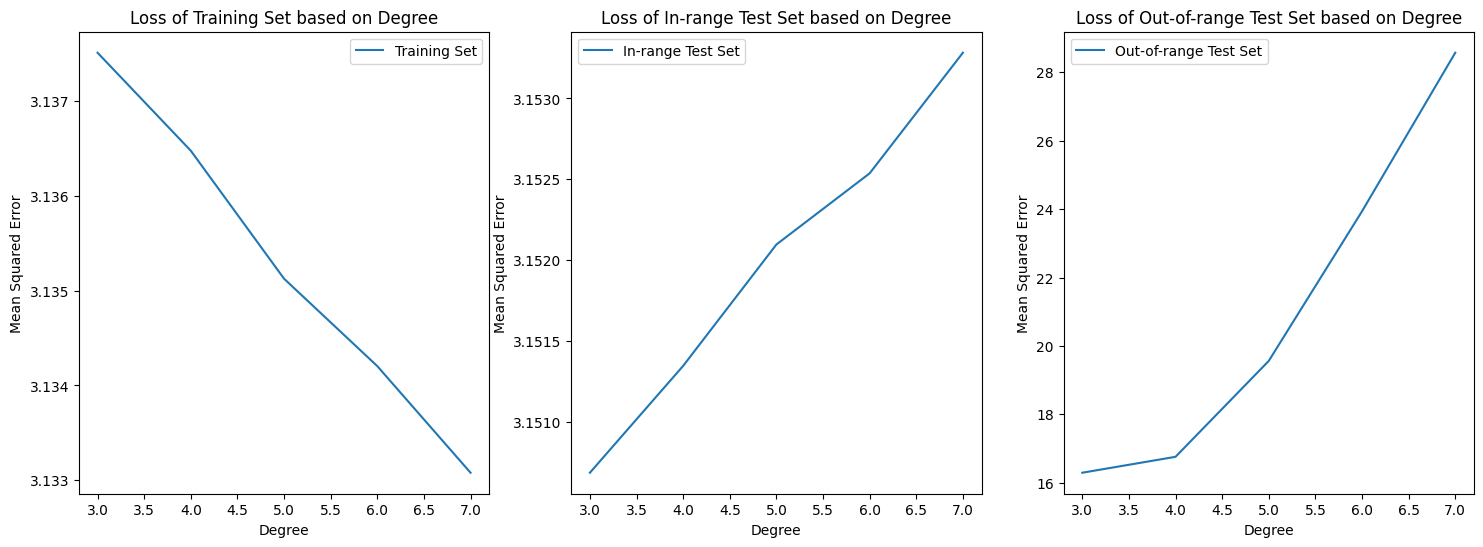

In [ ]:
from matplotlib import pyplot as plt

# TODO: Plot the logarithm of loss based on the model degrees from 3 to 7

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# TODO: Plot logarithm of losses of training set
ax1.plot(range(3, 8), np.log(list(losses_train.values())[1:]), label='Training Set')
ax1.set_title('Loss of Training Set based on Degree')
ax1.set_xlabel('Degree')
ax1.set_ylabel('Mean Squared Error')
ax1.legend()

# TODO: Plot logarithm of losses of in-range test set
ax2.plot(range(3, 8), np.log(list(losses_in_range.values())[1:]), label='In-range Test Set')
ax2.set_title('Loss of In-range Test Set based on Degree')
ax2.set_xlabel('Degree')
ax2.set_ylabel('Mean Squared Error')
ax2.legend()


# TODO: Plot logarithm of losses of out-of-range test set
ax3.plot(range(3, 8), np.log(list(losses_out_of_range.values())[1:]), label='Out-of-range Test Set')
ax3.set_title('Loss of Out-of-range Test Set based on Degree')
ax3.set_xlabel('Degree')
ax3.set_ylabel('Mean Squared Error')
ax3.legend()

## Conclusion (10 Points)

Now print out the losses on each set here.

In [ ]:
# TODO: print each model loss on the training and the two test sets
print("Training Set Losses:", losses_train)
print("In-range Test Set Losses:", losses_in_range)
print("Out-of-range Test Set Losses:", losses_out_of_range)

Training Set Losses: {2: 33.267253275042926, 3: 25.04843057180995, 4: 24.886451652266988, 5: 24.886454081876, 6: 24.8327280224161, 7: 24.83265346561088}
In-range Test Set Losses: {2: 33.04329120771641, 3: 22.84506601736942, 4: 22.596703503647433, 5: 22.596701049027157, 6: 22.565179917042535, 7: 22.560850579006413}
Out-of-range Test Set Losses: {2: 252278.84771384232, 3: 13551979.304715298, 4: 100177493.89824978, 5: 99815105.3068535, 6: 145544091037.63257, 7: 445431781993.84344}


With comparing the loss of **training set and the in-range test set** and also **in-range test set and the out-of-range test set**, specially in higher degrees, what we can conclude about the bias - variance trade off?

**Answer:**

Expected to explain overfiting on the training set and also the face that model has less generalization to unseen data.

**Comparison the loss of the training set with the in-range test set:**

In our analysis, we observe that the training set loss tends to be lower than the in-range test set loss, particularly in higher degrees of complexity in the model. Additionally, as the train set loss decreases, there's a corresponding increase in the in-range test set loss, indicating a phenomenon commonly associated with overfitting.
    
**Comparison the loss of the in-range test set with the out-of-range test set:**

In our analysis, we observe that the in-range test set tends to be lower than the in-range out-of-range test set, particularly in higher degrees of complexity in the model and this shows overfitting.